# 모듈 Import

In [11]:
import cv2 as cv
import sys
import os
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
from tensorflow.keras import models, layers, optimizers, utils
from keras.utils import np_utils #to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score,f1_score,recall_score

# Dataset

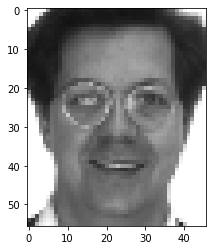

In [2]:
path='C:/Users/clari/Desktop/face/02_face_training'

images = []
labels = []
def crop_images(path, images):
    for img in os.listdir(path):
      img_array = cv.imread(os.path.join(path, img))/255.0
      images.append(img_array)
      label = np_utils.to_categorical(int(img[:4])-1, 350)
      labels.append(label)
    

crop_images(path, images)
plt.imshow(images[7])

In [3]:
images = np.array(images)
labels = np.array(labels)

# 모델 정의

In [18]:
model = models.Sequential()  # 레이어를 층층히 쌓아가는 연쇄 모델

model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), padding='Same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), padding='Same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), padding='Same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(312, kernel_initializer='he_normal'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(350, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# 학습

In [19]:
#Cross validation
num = 7
cross = KFold(n_splits = num, shuffle = True, random_state = 2021)
accs = [];  precision = [];  recall = [];  F1 = []
history = []
i = 0

for train_index,test_index in cross.split(images, labels):
    #훈련용
    x_train = images[train_index] #(900, 56, 46, 3)
    y_train = labels[train_index] #(900, 350)
    #검증용
    x_test = images[test_index] #(150, 56, 46, 3)
    y_test = labels[test_index] #(150, 350)
    
    i += 1    
    print('Fold' + str(i))
    
    #훈련용에 대해 model 학습시키고()
    history.append(model.fit(x_train, y_train, epochs = 50, batch_size = 50))
    print('-------------------------------------------------------------------------------')
        
    y_test = np.argmax(y_test,axis = 1)
    pred = np.argmax(model.predict(x_test).round(), axis = 1)
    
    #test로 model 검증(1)
    accs.append(accuracy_score(y_test, pred))
    precision.append(precision_score(y_test,pred, average = 'macro'))
    recall.append(recall_score(y_test, pred, average = 'macro'))
    F1.append(f1_score(y_test, pred, average = 'macro'))

Fold1
Epoch 1/50
18/18 [==============================] - 4s 170ms/step - loss: 5.8410 - accuracy: 0.0276
Epoch 2/50
18/18 [==============================] - 3s 162ms/step - loss: 4.0241 - accuracy: 0.2436
Epoch 3/50
18/18 [==============================] - 3s 166ms/step - loss: 2.7052 - accuracy: 0.5791
Epoch 4/50
18/18 [==============================] - 3s 160ms/step - loss: 1.6978 - accuracy: 0.7742
Epoch 5/50
18/18 [==============================] - 3s 149ms/step - loss: 0.8983 - accuracy: 0.9248
Epoch 6/50
18/18 [==============================] - 3s 145ms/step - loss: 0.4146 - accuracy: 0.9875
Epoch 7/50
18/18 [==============================] - 3s 159ms/step - loss: 0.2074 - accuracy: 0.9987
Epoch 8/50
18/18 [==============================] - 3s 167ms/step - loss: 0.1043 - accuracy: 0.9977
Epoch 9/50
18/18 [==============================] - 4s 210ms/step - loss: 0.0693 - accuracy: 1.0000
Epoch 10/50
18/18 [==============================] - 3s 160ms/step - loss: 0.0464 - accuracy: 

18/18 [==============================] - 3s 162ms/step - loss: 8.0194e-04 - accuracy: 1.0000
Epoch 31/50
18/18 [==============================] - 3s 166ms/step - loss: 7.8653e-04 - accuracy: 1.0000
Epoch 32/50
18/18 [==============================] - 3s 186ms/step - loss: 8.0213e-04 - accuracy: 1.0000
Epoch 33/50
18/18 [==============================] - 3s 169ms/step - loss: 7.5454e-04 - accuracy: 1.0000
Epoch 34/50
18/18 [==============================] - 3s 191ms/step - loss: 7.1194e-04 - accuracy: 1.0000
Epoch 35/50
18/18 [==============================] - 3s 195ms/step - loss: 7.1604e-04 - accuracy: 1.0000
Epoch 36/50
18/18 [==============================] - 3s 187ms/step - loss: 6.8750e-04 - accuracy: 1.00001s - loss: 6.6982e-04 
Epoch 37/50
18/18 [==============================] - 3s 181ms/step - loss: 6.7821e-04 - accuracy: 1.0000
Epoch 38/50
18/18 [==============================] - 3s 168ms/step - loss: 6.5039e-04 - accuracy: 1.0000
Epoch 39/50
18/18 [==========================

18/18 [==============================] - 3s 147ms/step - loss: 2.4685e-04 - accuracy: 1.0000
Epoch 7/50
18/18 [==============================] - 3s 147ms/step - loss: 2.2318e-04 - accuracy: 1.0000
Epoch 8/50
18/18 [==============================] - 3s 147ms/step - loss: 2.1802e-04 - accuracy: 1.0000
Epoch 9/50
18/18 [==============================] - 3s 144ms/step - loss: 2.1287e-04 - accuracy: 1.0000
Epoch 10/50
18/18 [==============================] - 3s 143ms/step - loss: 2.0320e-04 - accuracy: 1.0000
Epoch 11/50
18/18 [==============================] - 3s 144ms/step - loss: 1.9856e-04 - accuracy: 1.0000
Epoch 12/50
18/18 [==============================] - 3s 145ms/step - loss: 2.0167e-04 - accuracy: 1.0000
Epoch 13/50
18/18 [==============================] - 3s 144ms/step - loss: 2.0474e-04 - accuracy: 1.0000
Epoch 14/50
18/18 [==============================] - 3s 142ms/step - loss: 1.9511e-04 - accuracy: 1.0000
Epoch 15/50
18/18 [==============================] - 3s 144ms/step - l

18/18 [==============================] - 3s 148ms/step - loss: 8.1455e-05 - accuracy: 1.0000
Epoch 34/50
18/18 [==============================] - 3s 143ms/step - loss: 7.9156e-05 - accuracy: 1.0000
Epoch 35/50
18/18 [==============================] - 3s 145ms/step - loss: 7.8506e-05 - accuracy: 1.0000
Epoch 36/50
18/18 [==============================] - 3s 148ms/step - loss: 7.8700e-05 - accuracy: 1.0000
Epoch 37/50
18/18 [==============================] - 3s 142ms/step - loss: 8.4492e-05 - accuracy: 1.0000
Epoch 38/50
18/18 [==============================] - 3s 142ms/step - loss: 7.8665e-05 - accuracy: 1.0000
Epoch 39/50
18/18 [==============================] - 3s 142ms/step - loss: 7.3602e-05 - accuracy: 1.0000
Epoch 40/50
18/18 [==============================] - 3s 145ms/step - loss: 8.0196e-05 - accuracy: 1.0000
Epoch 41/50
18/18 [==============================] - 3s 141ms/step - loss: 7.2965e-05 - accuracy: 1.0000
Epoch 42/50
18/18 [==============================] - 3s 141ms/step 

18/18 [==============================] - 3s 146ms/step - loss: 4.0461e-05 - accuracy: 1.0000
Epoch 10/50
18/18 [==============================] - 3s 141ms/step - loss: 3.6108e-05 - accuracy: 1.0000
Epoch 11/50
18/18 [==============================] - 3s 144ms/step - loss: 3.6989e-05 - accuracy: 1.0000
Epoch 12/50
18/18 [==============================] - 3s 145ms/step - loss: 3.7620e-05 - accuracy: 1.0000
Epoch 13/50
18/18 [==============================] - 3s 145ms/step - loss: 3.8179e-05 - accuracy: 1.0000
Epoch 14/50
18/18 [==============================] - 3s 143ms/step - loss: 3.6685e-05 - accuracy: 1.0000
Epoch 15/50
18/18 [==============================] - 3s 141ms/step - loss: 3.5540e-05 - accuracy: 1.0000
Epoch 16/50
18/18 [==============================] - 3s 145ms/step - loss: 3.5748e-05 - accuracy: 1.0000
Epoch 17/50
18/18 [==============================] - 3s 143ms/step - loss: 3.6860e-05 - accuracy: 1.0000
Epoch 18/50
18/18 [==============================] - 3s 144ms/step 

In [6]:
for i in range(1,num+1):
    print("Fold%d 훈련 결과 : "%i)
    print("     accs : %.6f"%accs[i-1])
    print("     precision : %.6f"%precision[i-1])
    print("     recall : %.6f"%recall[i-1])
    print("     F1 : %.6f"%F1[i-1])

print("\n평균 훈련 결과")
print("     Accuracy : %.6f"%np.mean(accs))
print("     Precision : %.6f"%np.mean(precision))
print("     Recall Score : %.6f"%np.mean(recall))
print("     F1-Score : %.6f"%np.mean(F1))

Fold1 훈련 결과 : 
     accs : 0.760000
     precision : 0.822835
     recall : 0.787402
     F1 : 0.797900
Fold2 훈련 결과 : 
     accs : 1.000000
     precision : 1.000000
     recall : 1.000000
     F1 : 1.000000
Fold3 훈련 결과 : 
     accs : 1.000000
     precision : 1.000000
     recall : 1.000000
     F1 : 1.000000
Fold4 훈련 결과 : 
     accs : 1.000000
     precision : 1.000000
     recall : 1.000000
     F1 : 1.000000
Fold5 훈련 결과 : 
     accs : 1.000000
     precision : 1.000000
     recall : 1.000000
     F1 : 1.000000
Fold6 훈련 결과 : 
     accs : 1.000000
     precision : 1.000000
     recall : 1.000000
     F1 : 1.000000
Fold7 훈련 결과 : 
     accs : 1.000000
     precision : 1.000000
     recall : 1.000000
     F1 : 1.000000

평균 훈련 결과
     Accuracy : 0.965714
     Precision : 0.974691
     Recall Score : 0.969629
     F1-Score : 0.971129


# 훈련 과정 시각화

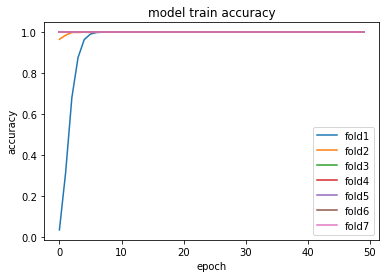

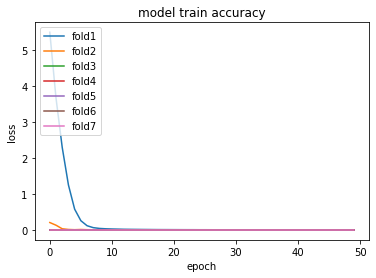

In [7]:
# summarize history for accuracy
plt.plot(history[0].history['accuracy'])
plt.plot(history[1].history['accuracy'])
plt.plot(history[2].history['accuracy'])
plt.plot(history[3].history['accuracy'])
plt.plot(history[4].history['accuracy'])
plt.plot(history[5].history['accuracy'])
plt.plot(history[6].history['accuracy'])
plt.title('model train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['fold1', 'fold2','fold3','fold4','fold5','fold6','fold7'], loc=0)
plt.show()

# summarize history for accuracy
plt.plot(history[0].history['loss'])
plt.plot(history[1].history['loss'])
plt.plot(history[2].history['loss'])
plt.plot(history[3].history['loss'])
plt.plot(history[4].history['loss'])
plt.plot(history[5].history['loss'])
plt.plot(history[6].history['loss'])
plt.title('model train accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['fold1', 'fold2','fold3','fold4','fold5','fold6','fold7'], loc='upper left')
plt.show()


# 테스트 데이터셋 예측

In [15]:
path='C:/Users/clari/Desktop/face/02_face_test'

test_num = []
test_images = []
def crop_test_images(path, test_images):
    for img in os.listdir(path):
      img_array = cv.imread(os.path.join(path, img))/255.0
      test_images.append(img_array)
      test_num.append(int(os.path.splitext(img)[0]))
        

crop_test_images(path, test_images)

In [16]:
test_images = np.array(test_images)
test_num = np.array(test_num)

In [20]:
pred = np.argmax(model.predict(test_images).round(), axis=1) + 1

df = pd.DataFrame({'Image': test_num, 'Answer': pred}).sort_values('Image')
df.to_csv('1871081_이희연_얼굴_2차_답안.csv', index = False)